# <center> Wrangle and Analyze Data </center>

<p>In this project, I will gather and clean a data set from a variety of sources mainly twitter, the data set is from an account called weratedoges and other sources I will use a twitter API to access some data </p>

In [1]:
# import librairies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import requests
import seaborn as sns 
import tweepy
import json
from timeit import default_timer as timer
%matplotlib inline

In [2]:
# setting up the API

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

## Gathering data

In [3]:
# Read the twitter archive into a dataset
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
# download the data from this url in udacity website and writing the content to tsv filea
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respense = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(respense.content) 

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [6]:
#Query  the Api for the data and writing to a file 
start = timer()
with open('tweet_json.txt', mode='w') as file:
    for tweet_id in twitter_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            json.dump(tweet._json , file)
            file.write('\n')
            print(tweet_id)
        except tweepy.TweepError as e:
            print('not found')
end = timer()
print(end - start)

In [7]:
# Create a data frame from tweet_json.txt
df_list = []
with open('tweet_json.txt', 'r') as file:
    for tweet in file.readlines():
        tweet = json.loads(tweet)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_list.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })
twitter_archive_df = pd.DataFrame(df_list, columns= ['tweet_id', 'retweet_count', 'favorite_count'])
twitter_archive_df.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7724,36279
1,892177421306343426,5710,31279
2,891815181378084864,3786,23545
3,891689557279858688,7878,39565
4,891327558926688256,8496,37785


## Assessing data

#### Quality 
<ul>
    <li> timestamp data type is object
    <li> There are some tweets which are not original tweets
    <li> Inaccurate values in the rating_denominator column
    <li> Inaccurate ratings in The rating_nominator column
    <li> Uneccesary columns 
    <li> romve url from the text column 
    <li> No name for the dog or a name with the letter 'a' 
    <li> Non descriptive name for images predictions columns 
        
</ul>

#### Tindens
<ul>
    <li> No need for three data frames on is sufficent 
    <li> replace columns doggo, floofer, pupper , puppo with one column 
</ul>

###  Assessing the twitter archive data frame 

In [8]:
twitter_archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [10]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10,10,Sophie,None,None,None,None
414,822859134160621569,NaN,NaN,2017-01-21 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He was told he was going to th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,None,None,None,None
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718540630...,10,10,None,None,None,None,None
1530,690021994562220032,NaN,NaN,2016-01-21 04:03:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Geoff (pronounced ""Kyle""). He acc...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/690021994...,10,10,Geoff,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
788,774314403806253056,NaN,NaN,2016-09-09 18:31:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774314403...,14,10,None,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
1266,709852847387627521,NaN,NaN,2016-03-15 21:24:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709852847...,12,10,None,None,None,None,None
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


###  Assessing the image predictions  data frame

In [14]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
186,669363888236994561,https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg,1,golden_retriever,0.539004,True,Irish_setter,0.406550,True,cocker_spaniel,0.041484,True
1777,828381636999917570,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0.392535,True,Labrador_retriever,0.089022,True,clumber,0.081800,True
1057,714631576617938945,https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg,1,meerkat,0.143497,False,weasel,0.117402,False,black-footed_ferret,0.099933,False
430,674269164442398721,https://pbs.twimg.com/media/CVt8OmIWIAAbxvJ.jpg,1,pug,0.622921,True,Norwegian_elkhound,0.048659,True,Cardigan,0.016966,True
141,668567822092664832,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True
576,678675843183484930,https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg,1,maze,0.339850,False,streetcar,0.099688,False,sundial,0.084808,False
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/68453...,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,Pembroke,0.987407,True,Cardigan,0.008723,True,basenji,0.003424,True
159,668892474547511297,https://pbs.twimg.com/media/CUhiJ63WEAAw2qm.jpg,1,kelpie,0.421979,True,collie,0.227060,True,Cardigan,0.168211,True
750,687826841265172480,https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg,1,Pomeranian,0.997210,True,Pekinese,0.000803,True,keeshond,0.000373,True


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


###  Assessing the twitter_archive_df  data frame 

In [19]:
twitter_archive_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7724,36279
1,892177421306343426,5710,31279
2,891815181378084864,3786,23545
3,891689557279858688,7878,39565
4,891327558926688256,8496,37785


In [20]:
twitter_archive_df.tail()

,tweet_id,retweet_count,favorite_count
2319,666049248165822465,39,96
2320,666044226329800704,132,272
2321,666033412701032449,41,112
2322,666029285002620928,42,121
2323,666020888022790149,462,2417


In [21]:
twitter_archive_df.sample(10)

,tweet_id,retweet_count,favorite_count
2195,668268907921326080,226,537
412,821149554670182400,2026,8778
944,750147208377409536,963,3118
1091,732726085725589504,884,3536
2013,671533943490011136,553,985
744,778027034220126208,1643,6655
2280,666776908487630848,163,331
940,750506206503038976,1148,4465
2085,670421925039075328,606,1263
517,807106840509214720,56858,120929


In [22]:
twitter_archive_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.324000e+03,2324.000000,2324.000000
mean,7.421061e+17,2715.941050,7593.562823
std,6.823827e+16,4587.590671,11770.581259
min,6.660209e+17,1.000000,0.000000
25%,6.783394e+17,549.000000,1320.750000
50%,7.185770e+17,1278.000000,3314.500000
75%,7.986836e+17,3162.500000,9297.500000
max,8.924206e+17,77985.000000,156513.000000


In [23]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2324 non-null   int64
 1   retweet_count   2324 non-null   int64
 2   favorite_count  2324 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


## Cleaning data

In [24]:
# Copy the orginal data to a data frame to be cleaned
twitter_archive_clean = twitter_archive.copy()
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions.copy()

##### Define 
<p> Fix the data type and format for the timestamp column in the twitter archive data frame  </p>

##### Code

In [25]:
# Convert timestamp to a desird foramt 
twitter_archive_clean.timestamp  = twitter_archive_clean.timestamp.str[:-9]
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

###### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

##### Define
<p>delet retweets   </p>

##### Code

In [27]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]


##### Test

In [28]:
twitter_archive_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

##### Define
<p> Fix the rating_denominator column </p>

##### Code

In [29]:
twitter_archive_clean['rating_denominator'] = 10

##### Test

In [30]:
twitter_archive_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

##### Define 
<p> Fix The rating_nominator column </p>

##### Code

In [31]:
twitter_archive_clean = twitter_archive_clean.query('rating_numerator < 20')
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

##### Define
<p> drop unnecessary columns </p>

##### Code

In [32]:
twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                                   'rating_numerator', 'rating_denominator'], inplace=True)

##### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               2151 non-null   int64         
 1   in_reply_to_status_id  72 non-null     float64       
 2   in_reply_to_user_id    72 non-null     float64       
 3   timestamp              2151 non-null   datetime64[ns]
 4   source                 2151 non-null   object        
 5   text                   2151 non-null   object        
 6   expanded_urls          2098 non-null   object        
 7   name                   2151 non-null   object        
 8   doggo                  2151 non-null   object        
 9   floofer                2151 non-null   object        
 10  pupper                 2151 non-null   object        
 11  puppo                  2151 non-null   object        
 12  rating                 2151 non-null   float64       
dtypes: 

##### Define
<p> Romove urls from the text column </p>

##### code

In [34]:
# romve urls from text
import re
twitter_archive_clean.text = twitter_archive_clean.text.str.replace(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '')

##### Test

In [35]:
twitter_archive_clean.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2151, dtype: object

##### Define 
<p> Fix the name column  </p>

##### Code 

In [36]:
twitter_archive_clean.text[np.random.randint(twitter_archive_clean.shape[0])]


"We normally don't rate lobsters, but this one appears to be a really good lobster. 10/10 would pet with caution "

In [37]:
regs = ['Say hello to\s(\w+)', 'This is\s(\w+)', 'RIP\s(\w+)', 'named \s(\w+)', 'name is\s(\w+)']

In [38]:
# A function to extracte the dogs names from the text columns 
import re
def extractnames(row):
    name = re.search(r'^[Tt]his is\s(\w+)', row) or re.search('Say hello to\s(\w+)', row) or \
                    re.search('This is\s(\w+)', row) or re.search('RIP\s(\w+)', row) or \
                    re.search('named \s(\w+)', row) or re.search('name is\s(\w+)', row)
    if name == None:
        return None 
    else:
        return name.group(1)
    return name

In [39]:
twitter_archive_clean. name = twitter_archive_clean.text.apply(extractnames)

In [40]:
twitter_archive_clean.name.replace('a', np.nan, inplace=True)

##### Test

In [41]:
twitter_archive_clean.name.value_counts()

Lucy        11
Oliver      10
Cooper      10
Penny        9
Charlie      9
            ..
Superpup     1
Butter       1
such         1
Timison      1
Cupid        1
Name: name, Length: 843, dtype: int64

##### Define 
<p> Make the columns names  in the image prediction dataframe more descriptive </p>

##### Code 

In [42]:
# reanme columns
image_predictions_clean.rename(columns={'p1':'prediction1', 'p1_conf': 'prediction1_confidance', \
                                       'p1_dog':'prediction1_accurcy', 'p2':'prediction2', \
                                       'p2_conf': 'prediction2_confidance', 'p2_dog':'prediction2_accurcy', \
                                       'p3':'prediction3', 'p3_conf': 'prediction3_confidance', \
                                        'p3_dog':'prediction3_accurcy'}, inplace=True)

In [43]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidance,prediction1_accurcy,prediction2,prediction2_confidance,prediction2_accurcy,prediction3,prediction3_confidance,prediction3_accurcy
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tindens

##### Define
<p> Make the dog stage in twitter archive a one column </p>

##### Code

In [44]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo.str.replace('None', '') + ' ' + \
                                     twitter_archive_clean.floofer.str.replace('None', '') + ' ' +  \
                                     twitter_archive_clean.pupper.str.replace('None', '') +  ' ' + \
                                     twitter_archive_clean.puppo.str.replace('None', '')
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.str.strip()

In [45]:
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

##### Test

In [46]:
twitter_archive_clean.dog_stage.value_counts()

                 1808
pupper            223
doggo              75
puppo              24
doggo  pupper      10
floofer             9
doggo   puppo       1
doggo floofer       1
Name: dog_stage, dtype: int64

In [47]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,


##### Define
<p> Merge the three dataframes into a single dataframe </p>

##### Code

In [48]:
twitter_archive_master1 = pd.merge(twitter_archive_df_clean, twitter_archive_clean, how='left')

In [49]:
twitter_archive_master1.head(2)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,rating,dog_stage
0,892420643555336193,7724,36279,NaN,NaN,2017-08-01 16:23:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,
1,892177421306343426,5710,31279,NaN,NaN,2017-08-01 00:17:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,


In [50]:
twitter_archive_master = pd.merge(twitter_archive_master1, image_predictions_clean, how='left')

In [51]:
twitter_archive_master.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,...,img_num,prediction1,prediction1_confidance,prediction1_accurcy,prediction2,prediction2_confidance,prediction2_accurcy,prediction3,prediction3_confidance,prediction3_accurcy
0,892420643555336193,7724,36279,NaN,NaN,2017-08-01 16:23:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,5710,31279,NaN,NaN,2017-08-01 00:17:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,3786,23545,NaN,NaN,2017-07-31 00:18:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7878,39565,NaN,NaN,2017-07-30 15:58:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,8496,37785,NaN,NaN,2017-07-29 16:00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [52]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [53]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 0 to 2323
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tweet_id                2324 non-null   int64         
 1   retweet_count           2324 non-null   int64         
 2   favorite_count          2324 non-null   int64         
 3   in_reply_to_status_id   72 non-null     float64       
 4   in_reply_to_user_id     72 non-null     float64       
 5   timestamp               2137 non-null   datetime64[ns]
 6   source                  2137 non-null   object        
 7   text                    2137 non-null   object        
 8   expanded_urls           2084 non-null   object        
 9   name                    1211 non-null   object        
 10  rating                  2137 non-null   float64       
 11  dog_stage               2137 non-null   object        
 12  jpg_url                 2052 non-null   object  

##### Analyze and visulaize 

In [54]:
twitter_archive_master.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,...,img_num,prediction1,prediction1_confidance,prediction1_accurcy,prediction2,prediction2_confidance,prediction2_accurcy,prediction3,prediction3_confidance,prediction3_accurcy
0,892420643555336193,7724,36279,NaN,NaN,2017-08-01 16:23:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,5710,31279,NaN,NaN,2017-08-01 00:17:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,3786,23545,NaN,NaN,2017-07-31 00:18:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7878,39565,NaN,NaN,2017-07-30 15:58:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,8496,37785,NaN,NaN,2017-07-29 16:00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [55]:
mean_retweet = twitter_archive_master.retweet_count.mean()

In [56]:
(twitter_archive_master.retweet_count < mean_retweet).sum()

1651

##### Retweet count
<p> Most of the tweet have an below averge retweet count which could indicate there are few outliers in this column, so let's use a boxplot to see it.<p>

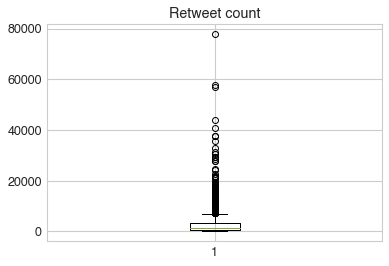

In [57]:
plt.boxplot(twitter_archive_master.retweet_count);
plt.title('Retweet count');

In [58]:
mean_rating = twitter_archive_master.rating.mean()

In [59]:
(twitter_archive_master.rating < mean_rating).sum()

866

##### Rating distrubtion

<p> Here I see the most the tweet have a rating better than the average which confirmed by a histogram which shows that distribution is skewed to the left. </p>

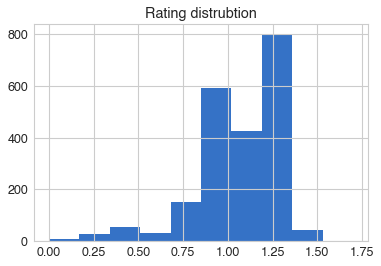

In [62]:
plt.hist(twitter_archive_master.rating);
plt.title('Rating distrubtion');

In [63]:
mean_fav = twitter_archive_master.favorite_count.mean()

In [64]:
(twitter_archive_master.favorite_count < mean_fav).sum()

1632

##### Favorite Count
<p> the number of tweets with favorite count blew average is big which could indicate a few outliers for this column also, which confirmed by a box plot.</p>

Text(0.5, 1.0, 'Favorite count')

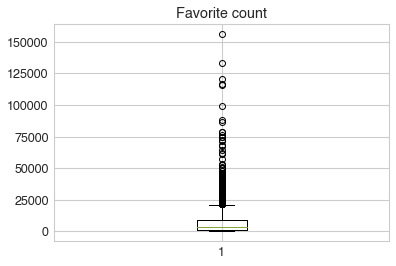

In [65]:
plt.boxplot(twitter_archive_master.favorite_count);
plt.title('Favorite count')

##### Prediction confidence

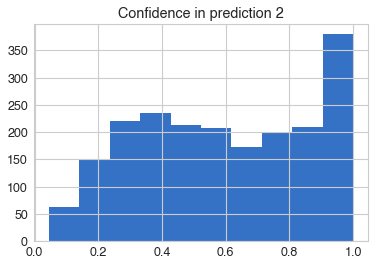

In [67]:
plt.hist(twitter_archive_master.prediction1_confidance);
plt.title('Confidence in prediction 2');

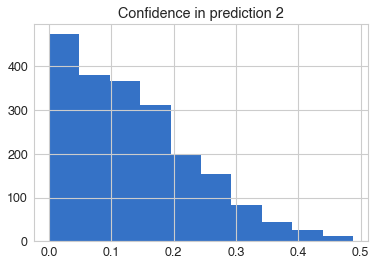

In [68]:
plt.hist(twitter_archive_master.prediction2_confidance);
plt.title('Confidence in prediction 2');

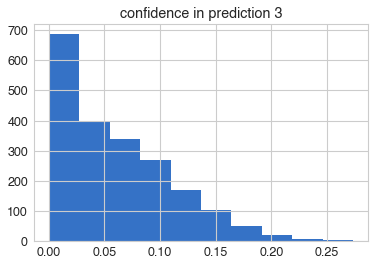

In [69]:
plt.hist(twitter_archive_master.prediction3_confidance);
plt.title('confidence in prediction 3');

<p> These three plot shows that the algorithm has more confidence in its prediction number one than the other two and more in the second than third.  </p>